In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
odds = pd.read_pickle('odds/odds_for_16')

In [3]:
print(odds.head())

   Date  Rot VH        Team  1st  2nd  3rd  4th  Final   Open Close    ML  \
0  1025  501  V     NewYork   18   27   19   24     88  205.5   206   355   
1  1025  502  H   Cleveland   28   20   34   35    117    9.5     9  -450   
2  1025  503  V        Utah   26   20   37   21    104    194   192   195   
3  1025  504  H    Portland   26   28   23   36    113      6   5.5  -235   
4  1025  505  V  SanAntonio   31   33   33   32    129  210.5   212   325   

      2H  GAME_ID  
0  103.5        1  
1      5        1  
2   99.5        2  
3     pk        2  
4    110        3  


In [4]:
refs = pd.read_pickle('refs/refs_for_216.pckl')
print(refs.head())

       OFFICIAL_ID FIRST_NAME LAST_NAME JERSEY_NUM  GAME_ID  REF_NUM
INDEX                                                               
1             1363     Bennie     Adams       47          1      0.0
2             1662       Bill   Kennedy       55          1      1.0
3           202026       Karl      Lane       77          1      2.0
4             1147       Mike  Callahan       24          2      0.0
5             2529       Tony     Brown       6           2      1.0


In [5]:
#Get play by play data
play = pd.read_pickle('play_by_play/play_by_play_for_216.pckl')
#Get all fouls
play = play.loc[play['EVENTMSGTYPE'] == 6]

In [6]:
print(play.head(15))

     index     GAME_ID  EVENTNUM  EVENTMSGTYPE  EVENTMSGACTIONTYPE  PERIOD  \
16      16  0021600001        16             6                   4       1   
21      21  0021600001        21             6                   2       1   
50      50  0021600001        57             6                   1       1   
54      54  0021600001        61             6                   2       1   
75      75  0021600001        85             6                   1       1   
76      76  0021600001        87             6                  17       1   
100    100  0021600001       119             6                   4       1   
107    107  0021600001       126             6                   2       1   
114    114  0021600001       135             6                   4       1   
116    116  0021600001       138             6                   2       1   
119    119  0021600001       144             6                   1       1   
156    156  0021600001       189             6                  

In [7]:
import datetime
for index, row in play.iterrows():
    time_of_event = datetime.datetime.strptime(row['PCTIMESTRING'], '%M:%S')
    elapsed_min = 12 - time_of_event.minute
    # print(elapsed_min)
    elapsed_sec = 59 - time_of_event.second
    # print(elapsed_sec)
    time_of_event = datetime.datetime.strptime(str(elapsed_min) + ':' 
                                               + str(elapsed_sec), '%M:%S')
    minutes = (row['PERIOD']-1) * 12
    time_of_event = time_of_event + datetime.timedelta(minutes=minutes)
    play.set_value(index, 'PCTIMESTRING', time_of_event.strftime('%M:%S'))
    

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [8]:
foul_occurences = play['PCTIMESTRING'].value_counts()



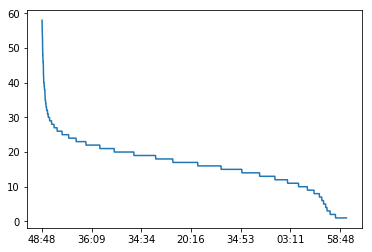

In [9]:
foul_occurences.plot()

In [10]:
unique_refs = refs['OFFICIAL_ID'].unique()

In [11]:
lebron_games = pd.read_pickle('player_tracking_by_year/player_tracking_for_216.pckl')

In [12]:
lebron_games = lebron_games.loc[lebron_games['PLAYER_ID'] == 2544]

In [13]:
print(lebron_games.head())


       GAME_ID     TEAM_ID TEAM_ABBREVIATION  TEAM_CITY  PLAYER_ID  \
13  0021600001  1610612739               CLE  Cleveland       2544   
0   0021600018  1610612739               CLE  Cleveland       2544   
13  0021600029  1610612739               CLE  Cleveland       2544   
13  0021600047  1610612739               CLE  Cleveland       2544   
12  0021600068  1610612739               CLE  Cleveland       2544   

     PLAYER_NAME START_POSITION COMMENT    MIN   SPD   ...     CFGM  CFGA  \
13  LeBron James              F          32:23  4.02   ...        7    10   
0   LeBron James              F          38:40  3.77   ...        4    10   
13  LeBron James              F          39:00  3.75   ...        4     7   
13  LeBron James              F          35:51  3.60   ...        3     7   
12  LeBron James              F          36:22  3.79   ...        6    13   

    CFG_PCT  UFGM  UFGA  UFG_PCT  FG_PCT  DFGM  DFGA  DFG_PCT  
13    0.700     2     4    0.500   0.643     2     4

In [14]:
refs_in_bron = refs[refs['GAME_ID'].isin(lebron_games['GAME_ID'])]

In [15]:
def game_id_reducer(gameid):
    return int(gameid[-4:])

In [16]:
games = pd.read_pickle('team_log_216')

In [17]:
print(games.head())

   index     Team_ID     Game_ID     GAME_DATE      MATCHUP WL   W   L  W_PCT  \
0      0  1610612737  0021601226  APR 12, 2017    ATL @ IND  L  43  39  0.524   
1      1  1610612737  0021601212  APR 11, 2017  ATL vs. CHA  W  43  38  0.531   
2      2  1610612737  0021601197  APR 09, 2017  ATL vs. CLE  W  42  38  0.525   
3      3  1610612737  0021601179  APR 07, 2017    ATL @ CLE  W  41  38  0.519   
4      4  1610612737  0021601177  APR 06, 2017  ATL vs. BOS  W  40  38  0.513   

   MIN ...   FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  PF  PTS  
0  240 ...    0.789     8    29   37   19    5    4   18  15   86  
1  240 ...    0.778    11    39   50   30    6    4   16  17  103  
2  265 ...    0.784    10    35   45   31    8    4   12  22  126  
3  240 ...    1.000     6    36   42   39    7    3   11  17  114  
4  240 ...    0.706    13    39   52   26    7    4   17  30  123  

[5 rows x 28 columns]


In [18]:
games = games[['Team_ID', 'Game_ID', 'WL']]

In [19]:
print(games.head())

      Team_ID     Game_ID WL
0  1610612737  0021601226  L
1  1610612737  0021601212  W
2  1610612737  0021601197  W
3  1610612737  0021601179  W
4  1610612737  0021601177  W


In [20]:
games['Game_ID'] = games['Game_ID'].map(game_id_reducer)

In [21]:
print(games.head())

      Team_ID  Game_ID WL
0  1610612737     1226  L
1  1610612737     1212  W
2  1610612737     1197  W
3  1610612737     1179  W
4  1610612737     1177  W


In [22]:
print(odds.head())

   Date  Rot VH        Team  1st  2nd  3rd  4th  Final   Open Close    ML  \
0  1025  501  V     NewYork   18   27   19   24     88  205.5   206   355   
1  1025  502  H   Cleveland   28   20   34   35    117    9.5     9  -450   
2  1025  503  V        Utah   26   20   37   21    104    194   192   195   
3  1025  504  H    Portland   26   28   23   36    113      6   5.5  -235   
4  1025  505  V  SanAntonio   31   33   33   32    129  210.5   212   325   

      2H  GAME_ID  
0  103.5        1  
1      5        1  
2   99.5        2  
3     pk        2  
4    110        3  
